In [7]:
# Import the GCT data file
import cmapPy
from cmapPy.pandasGEXpress.parse import parse
x=parse("D:\PAAD.gct")
x.data_df

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30
ZZEF1,10.10,9.8,9.8,9.7,10.10,10.4,9.7,10.6,10.00,9.90,...,10.60,9.90,9.8,10.30,10.4,10.20,9.9,9.80,9.6,10.90


In [8]:
a=x.col_metadata_df; # column meta data
rw=x.row_metadata_df; # row meta data
dt=x.data_df # the dataset with genes and sample

# Data cleaning
From the datasets the genes with NaN values were cleaned by the below code.
For removing the NaN values, we first calculated the total number of the NaN present in the dataset. On subtracting the dataset of the genes with NaN and the new dataset without any NaN, we obtain the total number of genes with NaN.


In [9]:
# To caculate the number of NaN values present in the dataset
dt.isnull().sum().sum()

134954

In [10]:
# To remove the NaN values from the dataset
dt_noNull=dt.dropna();
dt_noNull.isnull().sum().sum()

0

In [108]:
# To calculate the number of genes with NaN
dt.shape[0]-dt_noNull.shape[0]

4367

In [11]:
# The new dataset without genes containing NaN
dt_noNull.shape

(14098, 183)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statistics import mean
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

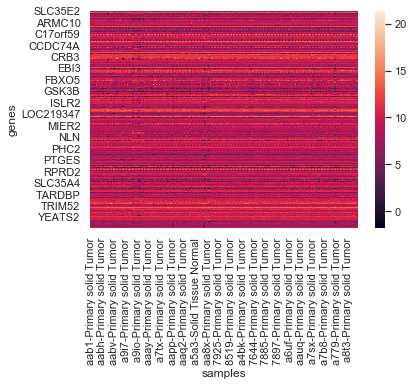

In [110]:
sns.heatmap(dt_noNull);
plt.xlabel('samples')
plt.ylabel('genes')
plt.show()

The distribution of the gene expression can be visualized by various ways such as histogram, heatmap, boxplot etc. Among these heatmap is the best way to clearly visualize the data matrix of a huge dataset. It helps to cluster the data in a particular fashion to study the relationship between the same gene expressed in different or same sample. However, I observed that even by using heatmap It was difficult to observe the behavior of the gene expression over samples. So, I calculated the average of the gene expression over samples to observe the trend of the distribution. From the figure., it is clearly visible that the few gene express at a very poorly over samples while most of the genes lie near to the average gene expression value.

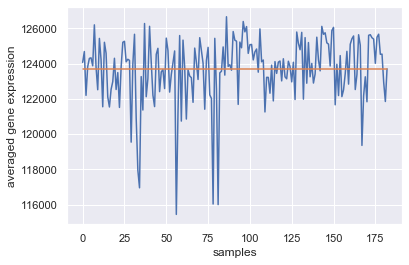

In [111]:
plt.plot(list(range(0, 183)),sum(dt_noNull.values))
plt.plot(list(range(0,183)),mean(sum(dt_noNull.values))*np.ones(183))
plt.xlabel('samples')
plt.ylabel('averaged gene expression')
plt.show()

In [21]:
# Normalization of the data and PCA Analysis
x = StandardScaler().fit_transform(np.transpose(dt_noNull.values))
pc=PCA(n_components=2)
pcComp=pc.fit_transform(x)
Xaxis=pcComp[:,0];
Yaxis=pcComp[:,1];

hstype=a.histological_type_other
hstype=hstype.values # denotes the histological paramters
adeno=list()
endo=list()
others=list()
for xx in range(183):
	c='b';
	if (type(hstype[xx])!=type(1.0)):
		if (hstype[xx].find('adeno')!=-1):
			adeno.append(xx)
		elif (hstype[xx].find('endo')!=-1):
			endo.append(xx)
		else:
			others.append(xx)
	else:
		others.append(xx)
print("Sample numbers with Adenocarcinoma")
print(adeno)
print("Sample numbers with Endocrine tumors")
print(endo)
print("Sample numbers with other tumors")
print(others)


Sample numbers with Adenocarcinoma
[0, 8, 9, 42, 69, 70, 81, 96, 104, 106, 107, 110, 111, 169, 177]
Sample numbers with Endocrine tumors
[22, 29, 30, 31, 32, 33, 34, 36]
Sample numbers with other tumors
[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 105, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182]


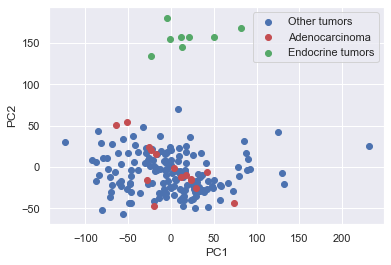

In [22]:
#  To visualize the whole data
plt.scatter(Xaxis[others],Yaxis[others],color='b')
plt.scatter(Xaxis[adeno],Yaxis[adeno],color='r')
plt.scatter(Xaxis[endo],Yaxis[endo],color='g')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(('Other tumors','Adenocarcinoma','Endocrine tumors'))

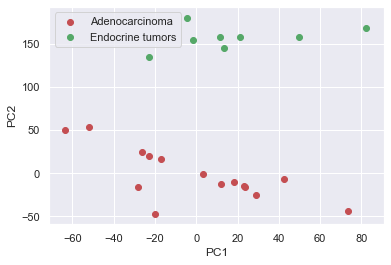

In [23]:
# to visualize adenocarcinoma and endocrine tumors and see if they are seperable
plt.scatter(Xaxis[adeno],Yaxis[adeno],color='r')
plt.scatter(Xaxis[endo],Yaxis[endo],color='g')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(('Adenocarcinoma','Endocrine tumors'))

In [30]:
# to observe the variance of the PCA
print("Variance for: PC1 = " , pc.explained_variance_ratio_[0], "and PC2 = " , pc.explained_variance_ratio_[1])

Variance for PC1 =  0.16429941 and PC2 =  0.11939807


Principle component analysis is a techique to reduce the dimensionality of the huge dataset to dimensions which can be easily visualized. It standarizes the whole features of the dataset to a scale of mean=0 and variance =1, so that a linear correlation between two principle component can be achieved. After applying PCA to the pancreatic tumor dataset , we observed that other than endocrine tumors, all the other types of tumor are scattered in closely packet fashion which also gives a idea that the endocrine tumors can be easily segregated from the other tumor types.

Yes, neuroendocrine tumors can be easily seperated from the adenocarcinoma tumors. We observe that except one sample all the other samples can be easily seperated out from the PCA plot.

I calculated the explained variance for each of the principal components which gives an idea how much variance was lost after the reduction from the higher dimension to two dimension dataset. In our analysis, we can clearly observe that principal component_1 and principal component_2 contains 16% of the variance and  11% of the variance respectively. That means only 27% of the total information about the pancreatic tumor is left after the analysis.


In [25]:
# The dataset with adenocarcinoma tumors only
dtset_new=dt_noNull;
dCol=dtset_new.columns.values;
dtset_new=dtset_new.drop(dCol[endo],axis=1)
dtset_new=dtset_new.drop(dCol[others],axis=1)
dtset_new.shape

(14098, 15)

In [43]:
# To read the IFNs gene set
ifn=list()
f = open('D:\\type1_IFN.txt', 'r')
ifn = f.readlines()
f.close()

In [44]:
ifn_new=list()
for itm in ifn:
    ifn_new.append(itm.rstrip())


In [47]:
ifn_new.remove('IRGM')

In [52]:
dtset_ifn=dtset_new.loc[ifn_new[0:24],:]

In [57]:
dtset_ifn # dataset with subsetted pancreatic tumor data

cid,aab1-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal,a45n-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a77e-Primary solid Tumor,a8t5-Primary solid Tumor
rid,,,,,,,,,,,,,,,
IFIT1,9.5,8.5,7.2,10.4,10.0,9.2,3.2,9.7,10.1,9.2,9.7,8.6,9.5,10.4,9.4
IFI44,9.4,8.6,7.9,10.5,11.2,9.5,4.1,8.9,10.1,9.2,10.4,8.9,9.8,10.9,9.3
IFIT3,10.0,9.1,9.1,10.8,10.9,9.8,7.3,9.8,10.5,9.3,10.1,8.9,9.5,10.1,9.6
MX2,9.8,9.2,9.2,11.1,11.4,9.2,10.0,8.9,9.8,9.5,10.7,9.2,9.7,10.9,9.7
OAS1,11.7,8.9,7.5,12.0,10.7,10.5,10.5,10.3,11.7,10.0,10.8,8.7,9.4,10.7,9.5
OAS3,11.3,10.1,9.5,12.3,11.4,10.6,10.2,10.6,11.1,9.8,11.7,10.1,10.6,11.7,10.0
BST2,12.2,9.9,10.8,13.2,12.1,11.5,12.0,10.4,11.9,11.1,12.5,10.6,10.3,12.2,12.0
IFITM1,11.2,9.7,10.6,12.7,12.3,11.3,10.5,11.2,11.9,11.2,12.7,9.8,11.2,12.7,12.1
MX1,11.5,10.7,10.4,12.7,12.7,10.9,8.4,10.4,11.8,10.9,12.0,10.4,11.3,12.4,10.8


In [58]:
dtset_ifn.shape

(24, 15)

Text(30.5, 0.5, 'IFN genes')

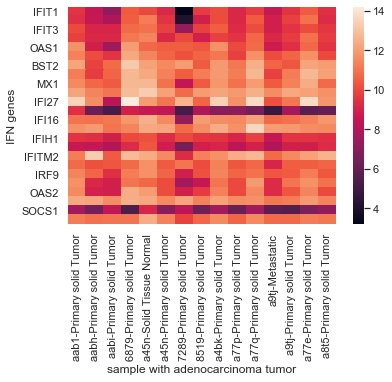

In [112]:
# to plot the subsetted gene expression data
sns.heatmap(dtset_ifn)
plt.xlabel('sample with adenocarcinoma tumor')
plt.ylabel('IFN genes')

yes,  I can plot the gene expression values for the genes for pancreatic adenocarcinoma. But the IFNs gene set contains 25 gene of homo sapiens, in which a gene named ‘IRGM’ can’t be plotted for pancreatic adenocarcinoma. As in the  dataset of normalized RNA Sequencing for pancreatic cancer tumors, the ‘IRGM’ gene has a NaN value which was removed during the initial data cleaning step, therefore the final heatmap will contain the gene expression values for 24 genes for pancreatic adenocarcinoma.
Gene Set Variation Analysis (GSVA) is used to calculate the  scores of the sample which are present  within or outside the gene set. For the analysis, the input gene expression data and the gene set are used to predict the variance of the gene set over the sample. It converts the per sample per gene expression matrix to per sample per gene pathway enrichment matrix. On applying GSVA to our dataset, the gene which were poorly expressed and the genes which were not subsetted were excluded. This also reduced the dimensionality of the data set and generated a pathway matrix which segregated the sample into subtypes.

In [103]:
# to calculate the GSVA score
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE
import pandas as pd

In [107]:
# to read the ifn file
geneset_df=pd.read_csv('D:\\type1_IFN.txt',index_col=0)
expression_df=dtset_new

In [113]:
# compute gsva score
pathways_df = gsva(expression_df,geneset_df)

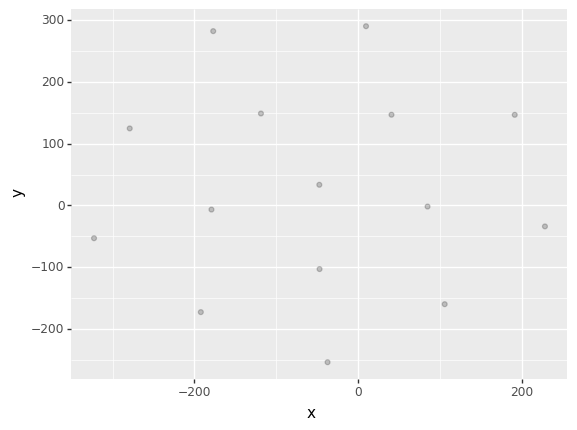

<ggplot: (20104381)>

In [101]:
# to plot the gsva score
XV = TSNE(n_components=2).\
    fit_transform(dtset_ifn.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

In [82]:
dfVal=df.values

In [85]:
lgnd=list(dict.fromkeys(hstype[adeno]))
colors=['r','g','b','k','y','c','m'];

[0, 1]
[2]
[3, 6, 7, 8, 9, 10, 11, 12]
[4, 5]
[13]
[14]


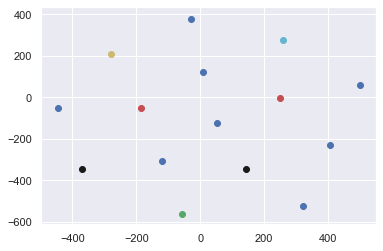

In [86]:
ar=list();
k=0;
hstype_adeno=hstype[adeno]
for im in lgnd: 
    for itm in range(len(hstype_adeno)):
        if (im==hstype_adeno[itm]):
            ar.append(itm)
    data=dfVal[ar]
    Xaxis=data[:,0]
    Yaxis=data[:,1]
    plt.scatter(Xaxis, Yaxis,color=colors[k])
    k=k+1
    print(ar)
    ar.clear()
    
    

In [81]:
dfval=df.values
dfval[[0,1]]

array([[-186.3962  ,  -53.30048 ],
       [ 249.72408 ,   -4.686817]], dtype=float32)